# Traffic Light Optimization: Using the GA
This guide demonstrates how to use the genetic algorithm to optimize traffic light timings in a SUMO network for reduced fuel consumption, CO₂ emissions, and waiting time.

**Note:** Before running this tutorial, please complete all steps in `setup.ipynb` to ensure the environment and dependencies are properly configured.

## Running the Genetic Algorithm and Visualizing Results

This section demonstrates how to use the genetic algorithm tool to optimize traffic light timings for reduced fuel, CO₂, and waiting time, and how to visualize the results.

In [ ]:
# Run the Genetic Algorithm (from Python)
import sys
import datetime
sys.path.append('scripts')
from ga import genetic_algorithm
from run_sumo import run_sumo

#########Change these to match your paths#########################
input_dir = 'sumo/defaults/mckenzie/verybasic'  # Folder with .net.xml and .rou.xml
# Generate a unique output directory name with timestamp
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f'sumo/run_{timestamp}'   # Output folder for results
working_dir = f'{output_dir}/genes'
##################################################################

genetic_algorithm(
    input_dir=input_dir,
    working_dir=working_dir,
    output_dir=output_dir,
    run_sumo_func=run_sumo,
    population_size=6,
    generations=3,
    mutation_rate=0.2,
    elite_size=2
)

### Output Files

- The `output_dir/genes/` folder contains all generated network and emissions files for each GA individual.
- The `output_dir/ga_top_variants.csv` file summarizes the top-performing variants and their traffic light settings.

You can use these files to analyze and visualize the optimization results.

In [ ]:
import pandas as pd

# Load the summary CSV
summary_path = 'sumo/jnotebook_test/ga_top_variants.csv'
df_summary = pd.read_csv(summary_path)
df_summary.head()

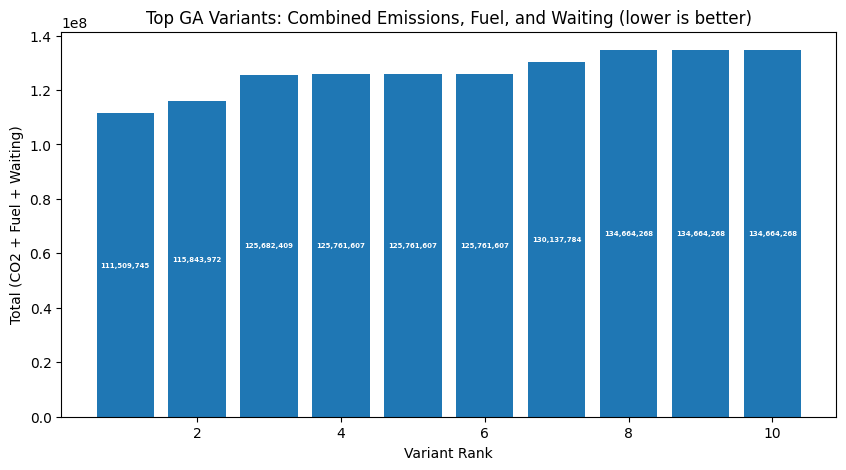

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_summary['Rank'], -df_summary['Fitness (negative)'])
plt.xlabel('Variant Rank')
plt.ylabel('Total (CO2 + Fuel + Waiting)')
plt.title('Top GA Variants: Combined Emissions, Fuel, and Waiting (lower is better)')

# Add value labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{height:,.0f}",
        ha='center',
        va='center',
        color='white',
        fontsize=5,
        fontweight='bold'
    )

plt.show()